In [11]:
!pip install pandas numpy matplotlib scikit-learn tensorflow scipy

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, LSTM, RepeatVector

In [13]:
# Load data
data = pd.read_excel('/content/drive/MyDrive/sine wave dataset.xlsx')
original_amplitude = data['Amplitude'].values
noised_amplitude = data['Amplitude_noise'].values

# Reshape and scale data
original_amplitude = original_amplitude.reshape(-1, 1)
noised_amplitude = noised_amplitude.reshape(-1, 1)

scaler = MinMaxScaler()
original_amplitude = scaler.fit_transform(original_amplitude)
noised_amplitude = scaler.transform(noised_amplitude)

# Windowing function
window_size = 4500

def create_windows(data, window_size):
    windows = []
    for i in range(len(data) - window_size + 1):
        windows.append(data[i:i + window_size])
    return np.array(windows)

X = create_windows(noised_amplitude, window_size)
y = create_windows(original_amplitude, window_size)

# Reshape for training
X_train = X.reshape(-1, window_size, 1)
y_train = y.reshape(-1, window_size, 1)


In [14]:
# Conv1D Autoencoder Model
input_signal = Input(shape=(window_size, 1))
x = Conv1D(16, 3, activation='relu', padding='same')(input_signal)
x = MaxPooling1D(2, padding='same')(x)
x = Conv1D(8, 3, activation='relu', padding='same')(x)
encoded = MaxPooling1D(2, padding='same')(x)

x = Conv1D(8, 3, activation='relu', padding='same')(encoded)
x = UpSampling1D(2)(x)
x = Conv1D(16, 3, activation='relu', padding='same')(x)
x = UpSampling1D(2)(x)
decoded = Conv1D(1, 3, activation='relu', padding='same')(x)

autoencoder = Model(input_signal, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train Conv1D Autoencoder
autoencoder.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)
denoised_signal = autoencoder.predict(X_train)
denoised_signal = scaler.inverse_transform(denoised_signal.reshape(-1, 1))

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 341ms/step - loss: 0.3563 - val_loss: 0.3202
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.2951 - val_loss: 0.2445
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2184 - val_loss: 0.1565
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1322 - val_loss: 0.0748
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0616 - val_loss: 0.0421
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0421 - val_loss: 0.0379
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0353 - val_loss: 0.0298
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0278 - val_loss: 0.0201
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0181 - val_loss: 0.0124
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0111 - val_loss: 0.0068
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0058 - val_loss: 0.0031
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0027 - val_loss: 0.0018


In [24]:
# LSTM Autoencoder Model
input_signal_lstm = Input(shape=(window_size, 1))
encoded_lstm = LSTM(64, activation='relu', return_sequences=True)(input_signal_lstm)
encoded_lstm = LSTM(32, activation='relu', return_sequences=False)(encoded_lstm)

decoded_lstm = RepeatVector(window_size)(encoded_lstm)
decoded_lstm = LSTM(32, activation='relu', return_sequences=True)(decoded_lstm)
decoded_lstm = LSTM(64, activation='relu', return_sequences=True)(decoded_lstm)
decoded_lstm = Conv1D(1, 3, activation='relu', padding='same')(decoded_lstm)

lstm_autoencoder = Model(input_signal_lstm, decoded_lstm)
lstm_autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train LSTM Autoencoder
lstm_autoencoder.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)
denoised_signal_lstm = lstm_autoencoder.predict(X_train)
denoised_signal_lstm = scaler.inverse_transform(denoised_signal_lstm.reshape(-1, 1))


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - loss: 0.3356 - val_loss: 0.2282
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - loss: 0.1982 - val_loss: 0.1380
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - loss: 0.1465 - val_loss: 0.1361
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - loss: 0.1397 - val_loss: 0.1300
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - loss: 0.1329 - val_loss: 0.1279
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - loss: 0.1296 - val_loss: 0.1277
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - loss: 0.1280 - val_loss: 0.1277
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - loss: 0.1268 - val_loss: 0.1275
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - loss: 0.1260 - val_loss: 0.1279
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - loss: 0.1258 - val_loss: 0.1280
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - loss: 0.1256 - val_loss: 0.1275
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - loss: 0.1258 - val_loss: 0.1275
Epoch 13/20
7

In [25]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D
from tensorflow.keras.optimizers import Adam

# Define the input layer
input_signal = Input(shape=(4500, 1))

# Build the convolutional layers
x = Conv1D(16, kernel_size=3, activation='relu', padding='same')(input_signal)
x = MaxPooling1D(pool_size=2, padding='same')(x)
x = Conv1D(8, kernel_size=3, activation='relu', padding='same')(x)
encoded = MaxPooling1D(pool_size=2, padding='same')(x)

# Build the upsampling layers
x = Conv1D(8, kernel_size=3, activation='relu', padding='same')(encoded)
x = UpSampling1D(size=2)(x)
x = Conv1D(16, kernel_size=3, activation='relu', padding='same')(x)
x = UpSampling1D(size=2)(x)
decoded = Conv1D(1, kernel_size=3, activation='relu', padding='same')(x)

# Compile the model
conv2_autoencoder = Model(inputs=input_signal, outputs=decoded)
conv2_autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
conv2_autoencoder.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)
denoised_signal_conv2 = conv2_autoencoder.predict(X_train)


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 377ms/step - loss: 0.3639 - val_loss: 0.3528
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.3348 - val_loss: 0.3132
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2893 - val_loss: 0.2327
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2028 - val_loss: 0.1270
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.1019 - val_loss: 0.0481
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0416 - val_loss: 0.0248
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0217 - val_loss: 0.0126
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0104 - val_loss: 0.0052
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0050 - val_loss: 0.0041
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0041 - val_loss: 0.0039
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0040 - val_loss: 0.0035
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0035 - val_loss: 0.0029


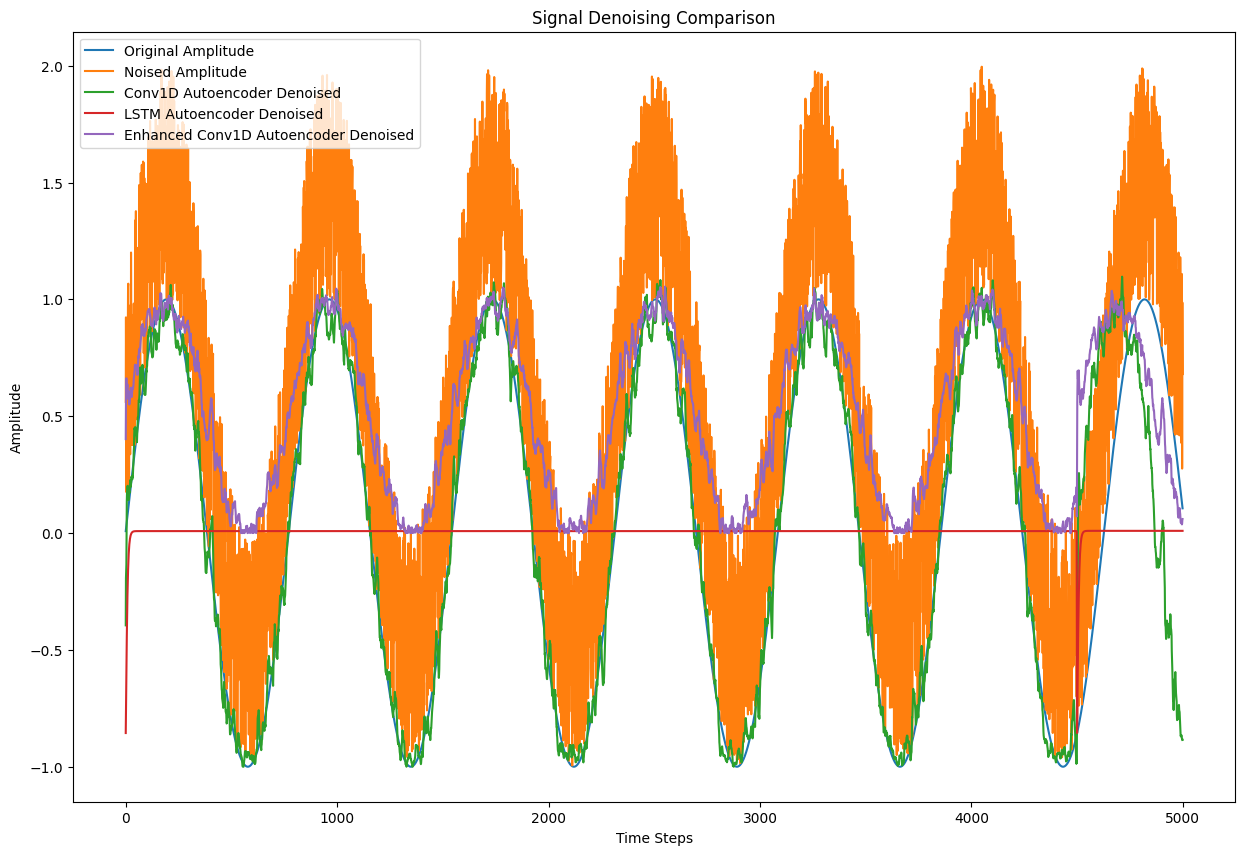

In [26]:
# Visualization
time_steps = np.arange(len(data))
plt.figure(figsize=(15, 10))
plt.plot(time_steps, data['Amplitude'], label='Original Amplitude')
plt.plot(time_steps, data['Amplitude_noise'], label='Noised Amplitude')
plt.plot(time_steps, denoised_signal.flatten()[:len(data)], label='Conv1D Autoencoder Denoised')
plt.plot(time_steps, denoised_signal_lstm.flatten()[:len(data)], label='LSTM Autoencoder Denoised')
plt.plot(time_steps, denoised_signal_conv2.flatten()[:len(data)], label='Enhanced Conv1D Autoencoder Denoised')

plt.xlabel('Time Steps')
plt.ylabel('Amplitude')
plt.title('Signal Denoising Comparison')
plt.legend()
plt.show()